### Notebook for running SONATA on x_branch dataset
Below, we replicate our results for x_branch dataset reported in *Securing diagonal integration of multimodal single-cell data against ambiguous mapping*




In [1]:
import os
import yaml
from sklearn.preprocessing import normalize
from types import SimpleNamespace

import sys
sys.path.append(os.path.dirname(os.getcwd()))
import sonata
from run_baselines.scot import scotv1
from utils.utils import *
from utils.vis import *

/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load parameters and datasets
with open("./cfgs/x_branch.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)
        
data_url1 = os.path.join(params.data_path, params.data_url1)
data_url2 = os.path.join(params.data_path, params.data_url2)
print("data_url1 = {}".format(data_url1))
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join(params.data_path, params.label_url1)
label_url2 = os.path.join(params.data_path, params.label_url2)
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

if params.norm: 
        data1 = normalize(data1, norm=params.norm)
        data2 = normalize(data2, norm=params.norm)

if params.sort_label: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)

print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


data_url1 = ../../data/x_branch/domain1.txt
data size: data1 = (300, 1000), data2 = (300, 2000)
data1 shape=(300, 1000)	data2 shape=(300, 2000)
label1 shape=(300,)	label2 shape=(300,)


### 1. visualize two modalities

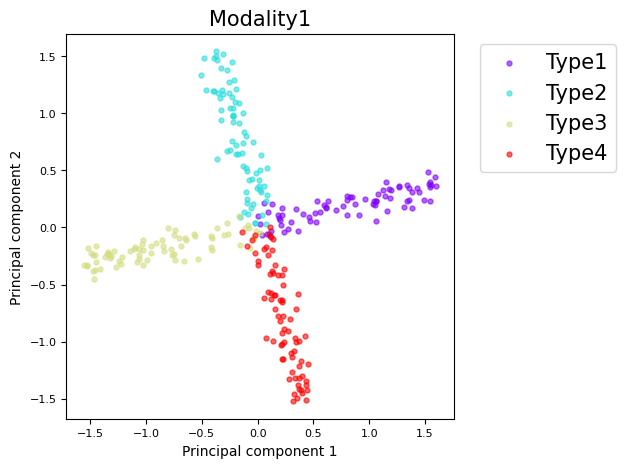

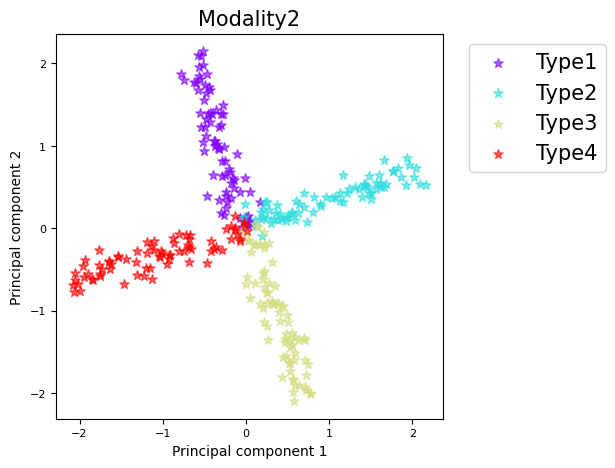

In [3]:
plt_domain_by_labels(data1, label1, title='Modality1', marker='.', a=0.6, show=True)
plt_domain_by_labels(data2, label2, title='Modality2', marker='*', a=0.6, show=True)

### 2. SONATA Diagnose

In [4]:
sn1 = sonata.sonata(noise_scale=params.noise_scale, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster, 
                    repeat=params.repeat, mode=params.mode, metric=params.metric)
DiagnoseResult1 = sn1.diagnose(data1, save_dir=os.path.join(params.save_dir, "Modality1"))

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_neighbor=10, noise_scale=0.2, scaleOT = False, scale_sample_rate = 0.1


  0%|          | 0/20 [00:00<?, ?it/s]

---------------OT Alignment Iter=0--------------
It.  |Err         
-------------------
    0|7.598143e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|4.934045e-07|


  5%|▌         | 1/20 [00:03<01:03,  3.37s/it]

   20|2.470396e-12|
---------------OT Alignment Iter=1--------------
It.  |Err         
-------------------
    0|7.670359e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 10%|█         | 2/20 [00:05<00:52,  2.89s/it]

   10|8.205766e-10|
---------------OT Alignment Iter=2--------------
It.  |Err         
-------------------
    0|7.629987e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 15%|█▌        | 3/20 [00:08<00:49,  2.91s/it]

   10|5.167243e-10|
---------------OT Alignment Iter=3--------------
It.  |Err         
-------------------
    0|7.607795e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.595571e-08|


 20%|██        | 4/20 [00:13<00:56,  3.50s/it]

   20|3.274457e-15|
---------------OT Alignment Iter=4--------------
It.  |Err         
-------------------
    0|7.826773e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 25%|██▌       | 5/20 [00:15<00:45,  3.01s/it]

   10|4.695293e-10|
---------------OT Alignment Iter=5--------------


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.684688e-03|
   10|1.084588e-07|


 30%|███       | 6/20 [00:19<00:48,  3.49s/it]

   20|7.374335e-14|
---------------OT Alignment Iter=6--------------
It.  |Err         
-------------------
    0|7.534714e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.167733e-08|


 35%|███▌      | 7/20 [00:24<00:50,  3.89s/it]

   20|1.477607e-14|
---------------OT Alignment Iter=7--------------


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.721697e-03|
   10|4.814381e-08|


 40%|████      | 8/20 [00:28<00:48,  4.01s/it]

   20|1.074056e-14|
---------------OT Alignment Iter=8--------------
It.  |Err         
-------------------
    0|7.540602e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|7.831276e-08|


 45%|████▌     | 9/20 [00:32<00:44,  4.02s/it]

   20|3.863236e-14|
---------------OT Alignment Iter=9--------------
It.  |Err         
-------------------
    0|7.492495e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.891584e-08|


 50%|█████     | 10/20 [00:36<00:39,  3.94s/it]

   20|6.777076e-15|
---------------OT Alignment Iter=10--------------
It.  |Err         
-------------------
    0|7.752669e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.405691e-09|


 55%|█████▌    | 11/20 [00:40<00:34,  3.80s/it]

   20|1.388655e-15|
---------------OT Alignment Iter=11--------------


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.652804e-03|
   10|1.845788e-06|


 60%|██████    | 12/20 [00:44<00:32,  4.04s/it]

   20|8.858089e-12|
---------------OT Alignment Iter=12--------------
It.  |Err         
-------------------
    0|7.817822e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 65%|██████▌   | 13/20 [00:46<00:23,  3.32s/it]

   10|1.232183e-10|
---------------OT Alignment Iter=13--------------
It.  |Err         
-------------------
    0|7.772525e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 70%|███████   | 14/20 [00:48<00:17,  2.97s/it]

   10|2.356088e-10|
---------------OT Alignment Iter=14--------------
It.  |Err         
-------------------
    0|7.659808e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|6.492697e-07|


 75%|███████▌  | 15/20 [00:52<00:16,  3.22s/it]

   20|9.495188e-13|
---------------OT Alignment Iter=15--------------
It.  |Err         
-------------------
    0|7.840908e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 80%|████████  | 16/20 [00:54<00:11,  2.91s/it]

   10|3.254988e-10|
---------------OT Alignment Iter=16--------------
It.  |Err         
-------------------
    0|7.779404e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|6.655970e-08|


 85%|████████▌ | 17/20 [00:57<00:09,  3.04s/it]

   20|2.724997e-14|
---------------OT Alignment Iter=17--------------
It.  |Err         
-------------------
    0|7.746504e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.056003e-07|


 90%|█████████ | 18/20 [01:02<00:07,  3.52s/it]

   20|1.525197e-13|
---------------OT Alignment Iter=18--------------


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.766157e-03|
   10|3.312490e-09|


 95%|█████████▌| 19/20 [01:06<00:03,  3.56s/it]

   20|1.381056e-15|
---------------OT Alignment Iter=19--------------
It.  |Err         
-------------------
    0|7.628451e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 20/20 [01:08<00:00,  3.42s/it]

   10|5.959031e-10|
---------------Coupling Denoising Iter=0--------------
---------------Coupling Denoising Iter=1--------------
---------------Coupling Denoising Iter=2--------------
---------------Coupling Denoising Iter=3--------------
---------------Coupling Denoising Iter=4--------------
---------------Coupling Denoising Iter=5--------------
---------------Coupling Denoising Iter=6--------------
---------------Coupling Denoising Iter=7--------------
---------------Coupling Denoising Iter=8--------------
---------------Coupling Denoising Iter=9--------------
---------------Coupling Denoising Iter=10--------------


---------------Coupling Denoising Iter=11--------------
---------------Coupling Denoising Iter=12--------------
---------------Coupling Denoising Iter=13--------------
---------------Coupling Denoising Iter=14--------------
---------------Coupling Denoising Iter=15--------------
---------------Coupling Denoising Iter=16--------------
---------------Coupling Denoising Iter=17--------------
---------------Coupling Denoising Iter=18--------------
---------------Coupling Denoising Iter=19--------------
Outlier cluster indices=[ 16  33  44  58  75  78  87  90 109 155 156 169 201 217 253 271 272 289
 306 307]
iter=0	include_indices=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36
  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55
  56  57  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  76  77  79  80  81  82  83  84  85  86  88  89  91  92  93  94  95  96
 

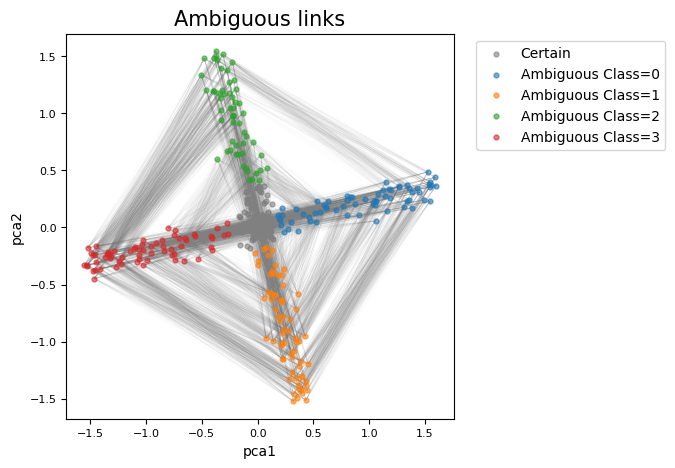

In [5]:
plt_cannotlink_by_labelcolor(data1, DiagnoseResult1.ambiguous_idx, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

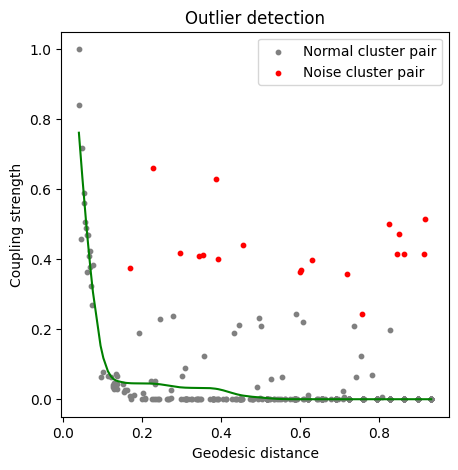

In [6]:
scatter_x = sn1.spline_data.spline_dist
scatter_y = sn1.spline_data.spline_coupling
include_indices = sn1.spline_data.include_indices
exclude_indices = sn1.spline_data.exclude_indices
spline_x = sn1.spline_data.spline_x
spline_y = sn1.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier detection", show=True)

### 3. Mapping by SCOT v1 (or any other manifold aligners)

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.919198e-03|
   10|1.753192e-08|
   20|3.304191e-15|


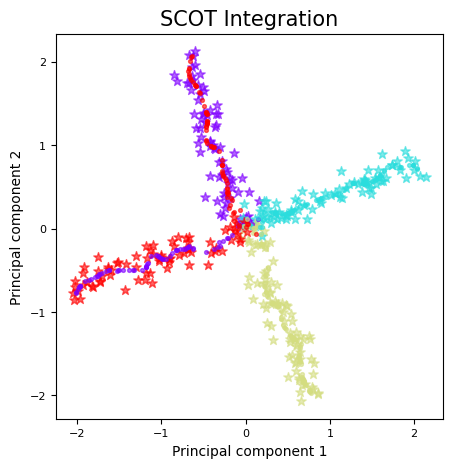

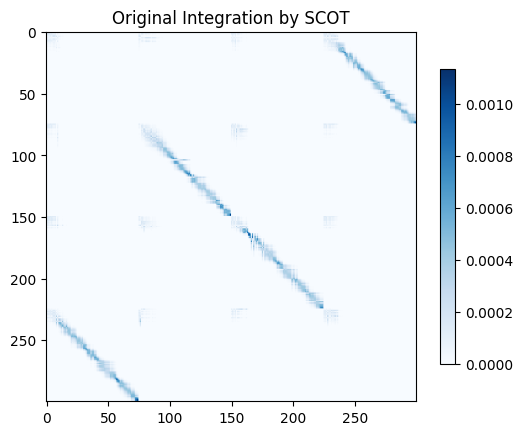

In [7]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
x_aligned, y_aligned = scot.align(k = params.n_neighbor, e=params.e, mode=params.mode, metric=params.metric, normalize=params.norm)
mapping = scot.coupling

plt_mapping_by_labels(x_aligned, y_aligned, label1, label2, title = "SCOT Integration", a = 0.6, show=True)   
plt_heatmap(mapping, title="Original Integration by SCOT", show=True)

#### 4. SONATA Corrects the Ambiguous Alignment
We correct ambiguous alignments using the diagnostic results from modality 1 for illustration, though both diagonal results can also be checked.

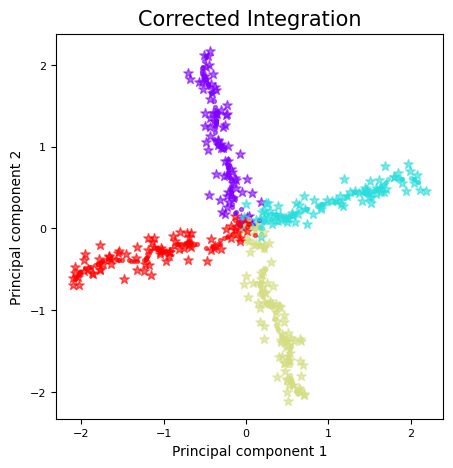

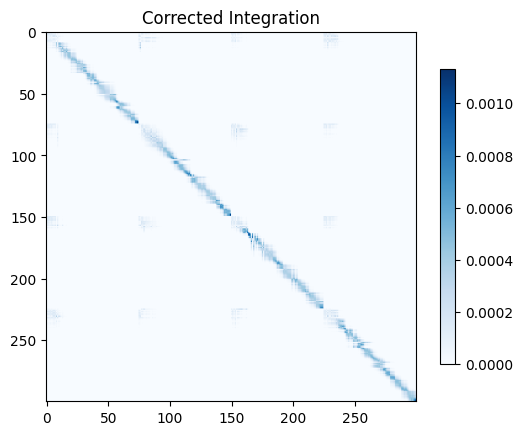

In [8]:
alter_mappings = sonata.map_ambiguous_groups(data1, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.ambiguous_idx)
x_aligned_best, y_aligned_best, best_mapping, _ = sonata_best_acc(x_aligned, y_aligned, label1, label2, alter_mappings, mapping)
     
plt_mapping_by_labels(x_aligned_best, y_aligned_best, label1, label2, title = "Corrected Integration", a = 0.6, show=True)   
plt_heatmap(best_mapping, title="Corrected Integration", show=True)